In [8]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [9]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display basic information
print("Shape of Dataset:", df.shape)
print("\nColumns in Dataset:\n", df.columns)

# Preview the first 5 rows
df.head()


Shape of Dataset: (1470, 35)

Columns in Dataset:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
# Check null values
print("Null values in each column:")
print(df.isnull().sum().sum())

# Check duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Basic dataset info
df.info()


Null values in each column:
0

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement     

In [12]:
# Make a copy for safety
df_clean = df.copy()

# Convert simple Yes/No columns to 1/0
binary_cols = ["Attrition", "OverTime"]

for col in binary_cols:
    df_clean[col] = df_clean[col].map({"Yes": 1, "No": 0})

print("Updated Columns:", df_clean[binary_cols].head())


Updated Columns:    Attrition  OverTime
0          1         1
1          0         0
2          1         1
3          0         1
4          0         0


/tmp/ipython-input-2814937351.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df_clean, palette="coolwarm")


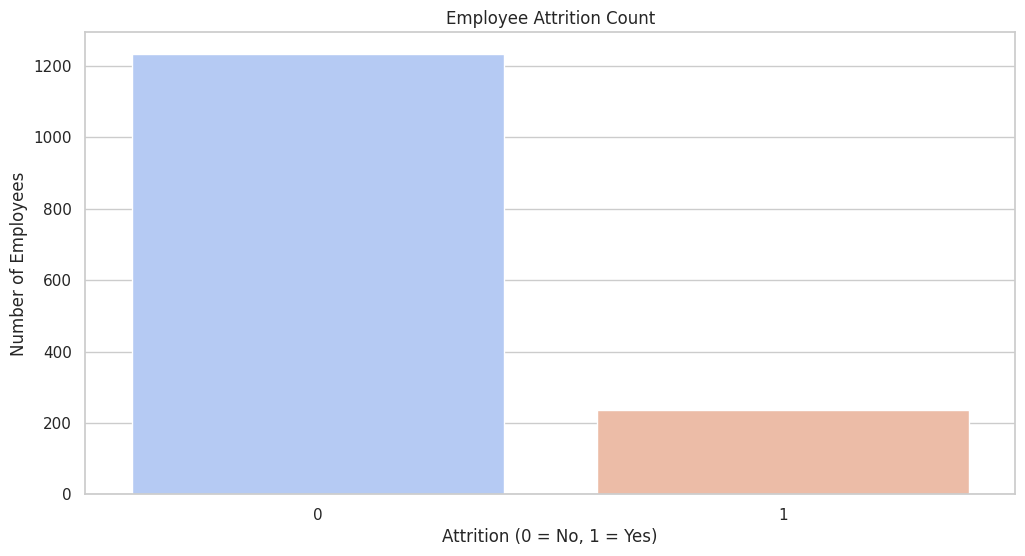

In [13]:
sns.countplot(x="Attrition", data=df_clean, palette="coolwarm")
plt.title("Employee Attrition Count")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Number of Employees")
plt.show()


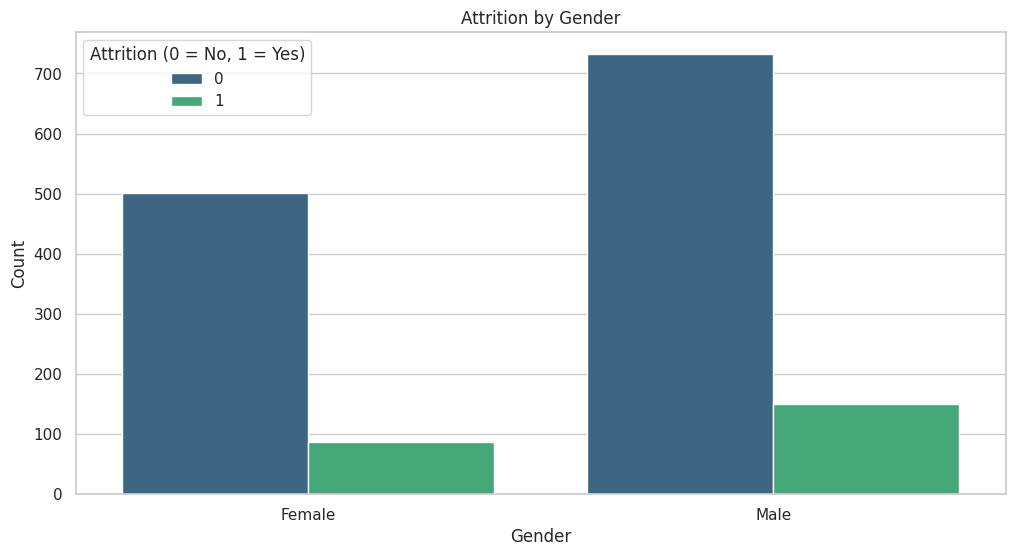

In [14]:
sns.countplot(x="Gender", hue="Attrition", data=df_clean, palette="viridis")
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.show()


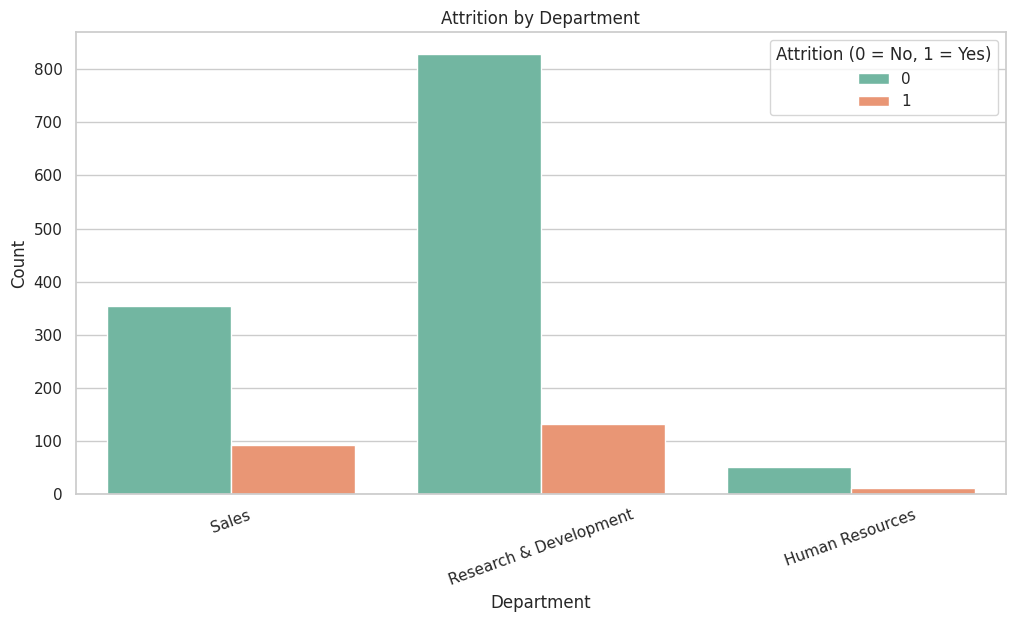

In [15]:
sns.countplot(x="Department", hue="Attrition", data=df_clean, palette="Set2")
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.show()


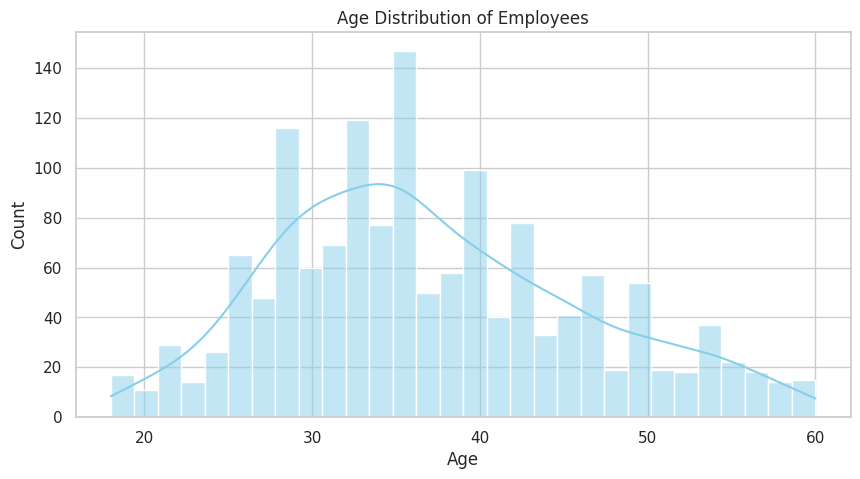

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-195772628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="Age", data=df_clean, palette="cool")


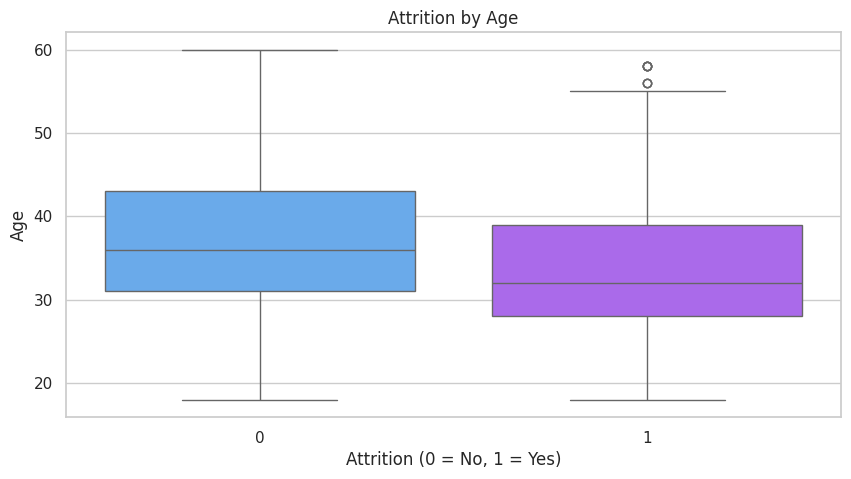

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Attrition", y="Age", data=df_clean, palette="cool")
plt.title("Attrition by Age")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()



✔ Younger employees (age 25–35) have higher attrition
✔ Older employees (40+) have lower attrition

In [18]:
# Make a fresh copy for ML
df_ml = df_clean.copy()

# Identify categorical columns (object type)
cat_cols = df_ml.select_dtypes(include=['object']).columns
cat_cols


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')

In [19]:
# Apply Label Encoding to all categorical columns
le = LabelEncoder()

for col in cat_cols:
    df_ml[col] = le.fit_transform(df_ml[col])

# Show updated data types
df_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [20]:
# Target variable
y = df_ml["Attrition"]

# Features (all except Attrition)
X = df_ml.drop("Attrition", axis=1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1176, 34), (294, 34), (1176,), (294,))

In [21]:
# Train Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"   # handles imbalance in attrition
)

rf.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [22]:
# Predict on test data
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8401

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294


Confusion Matrix:
[[243   4]
 [ 43   4]]


But in HR attrition prediction, accuracy is NOT the most important metric, because the dataset is highly imbalanced:

Attrition = Yes (1) → only 15%

Attrition = No (0) → around 85%

So a model could guess “No” for everyone and still get 85% accuracy.

Increase class weight (stronger balancing)

In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class (Attrition = Yes)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_resampled.value_counts())



Before SMOTE: Attrition
0    986
1    190
Name: count, dtype: int64
After SMOTE: Attrition
0    986
1    986
Name: count, dtype: int64


In [26]:
rf_smote = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf_smote.fit(X_resampled, y_resampled)

print("Model training with SMOTE completed.")


Model training with SMOTE completed.


In [27]:
# Predict on test data
y_pred_smote = rf_smote.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy after SMOTE: {accuracy:.4f}")

# Classification Report
print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
print("\nConfusion Matrix (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))


Accuracy after SMOTE: 0.8027

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.37      0.32      0.34        47

    accuracy                           0.80       294
   macro avg       0.62      0.61      0.61       294
weighted avg       0.79      0.80      0.80       294


Confusion Matrix (SMOTE):
[[221  26]
 [ 32  15]]


/tmp/ipython-input-1889327664.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


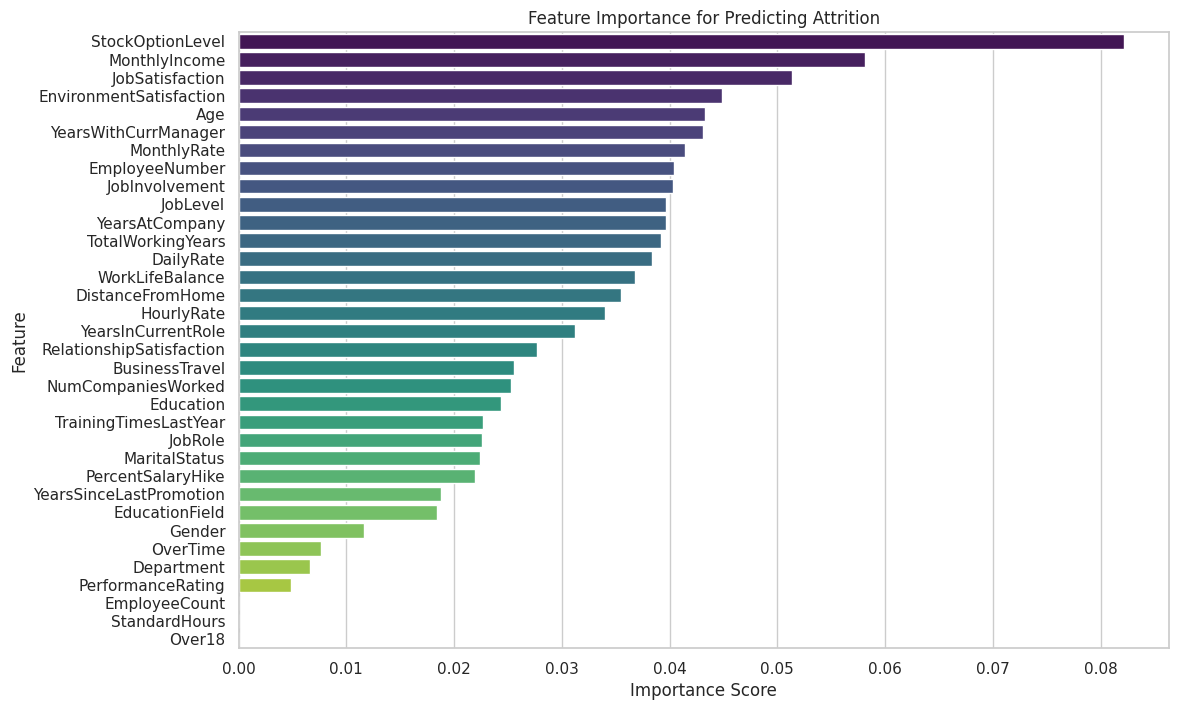

,Feature,Importance
26,StockOptionLevel,0.082212
17,MonthlyIncome,0.058148
15,JobSatisfaction,0.051361
9,EnvironmentSatisfaction,0.044866
0,Age,0.043272
33,YearsWithCurrManager,0.043134
18,MonthlyRate,0.041408
8,EmployeeNumber,0.040452
12,JobInvolvement,0.040353
13,JobLevel,0.039711


In [28]:
# Get feature importance values
importances = rf_smote.feature_importances_
feature_names = X.columns

# Create DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Feature Importance for Predicting Attrition")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

fi_df.head(10)


In [30]:
# Function to predict attrition for a new employee row

def predict_attrition(new_data):
    new_df = pd.DataFrame([new_data], columns=X.columns)
    prediction = rf_smote.predict(new_df)[0]
    probability = rf_smote.predict_proba(new_df)[0][1]

    print("\n🔍 Prediction for New Employee:")
    print("Attrition:", "Yes" if prediction == 1 else "No")
    print(f"Probability of Leaving: {probability:.2%}")



In [31]:
test_employee = {
    'Age': 29,
    'BusinessTravel': 1,
    'DailyRate': 800,
    'Department': 2,
    'DistanceFromHome': 10,
    'Education': 3,
    'EducationField': 4,
    'EmployeeCount': 1,
    'EmployeeNumber': 1000,
    'EnvironmentSatisfaction': 2,
    'Gender': 1,
    'HourlyRate': 70,
    'JobInvolvement': 2,
    'JobLevel': 1,
    'JobRole': 3,
    'JobSatisfaction': 2,
    'MaritalStatus': 0,
    'MonthlyIncome': 3500,
    'MonthlyRate': 9000,
    'NumCompaniesWorked': 2,
    'Over18': 0,
    'OverTime': 1,
    'PercentSalaryHike': 13,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 2,
    'StandardHours': 80,
    'StockOptionLevel': 0,
    'TotalWorkingYears': 5,
    'TrainingTimesLastYear': 2,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 3,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2
}

predict_attrition(test_employee)



🔍 Prediction for New Employee:
Attrition: Yes
Probability of Leaving: 95.33%
